In [ ]:
# 📌 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

In [ ]:
# 📂 Upload Dataset Manually
print("Please upload your dataset file")
uploaded = files.upload()


Please upload your dataset file


Saving data.csv to data.csv


In [ ]:
# Get the uploaded file name
dataset_name = list(uploaded.keys())[0]
import os

# Load CSV Dataset
!pip install pandas

df = pd.read_csv(dataset_name, encoding='ISO-8859-1')

In [ ]:
# 🔍 Inspect Dataset
print("Dataset Overview:")
print(df.info())  # Data types & missing values
print("\nFirst 5 Rows:")
print(df.head())  # Display first few rows

# 🛠 Data Cleaning
## Drop unnecessary columns
df.drop(columns=['Geometry'], inplace=True)

## Convert NSDP values to numeric (remove currency symbols & commas)
for col in df.columns[1:-2]:  # Skip State Name and Growth columns
    df[col] = df[col].replace({'â¹': '', ',': ''}, regex=True).astype(float)

## Convert Growth columns to numeric
df['Growth from 2000 to 2010'] = df['Growth from 2000 to 2010'].str.replace('%', '').astype(float)
df['Growth from 2010 to 2019'] = df['Growth from 2010 to 2019'].str.replace('%', '').astype(float)

# 🔍 Verify Cleaning
print("\nCleaned Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows of Cleaned Data:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   State Name                        29 non-null     object
 1   Geometry                          29 non-null     object
 2   NSDP Per Capita (Nominal)1996-97  29 non-null     object
 3   NSDP Per Capita (Nominal)2000-01  29 non-null     object
 4   NSDP Per Capita (Nominal)2005-06  29 non-null     object
 5   NSDP Per Capita (Nominal)2010-11  29 non-null     object
 6   NSDP Per Capita (Nominal)2011-12  29 non-null     object
 7   NSDP Per Capita (Nominal)2012-13  29 non-null     object
 8   NSDP Per Capita (Nominal)2013-14  29 non-null     object
 9   NSDP Per Capita (Nominal)2014-15  29 non-null     object
 10  NSDP Per Capita (Nominal)2015-16  29 non-null     object
 11  NSDP Per Capita (Nominal)2016-17  29 non-null     object
 12  NSDP P

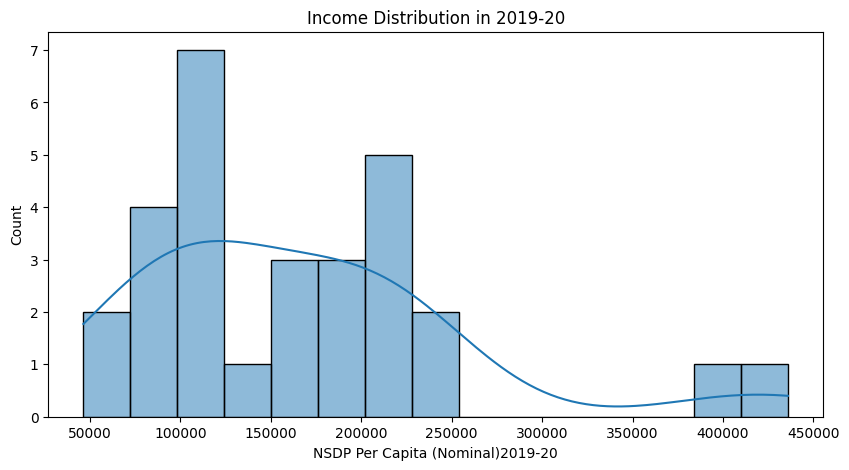

In [ ]:
# 📊 Exploratory Data Analysis (EDA)
## Income Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["NSDP Per Capita (Nominal)2019-20"], bins=15, kde=True)
plt.title("Income Distribution in 2019-20")
plt.show()

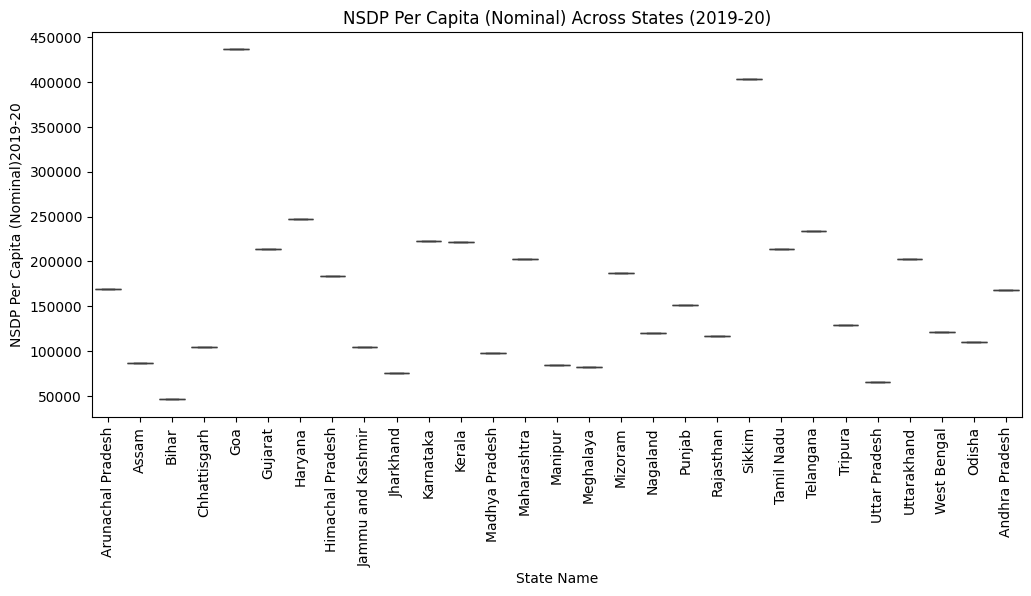

In [ ]:
## State-wise Income Box Plot
plt.figure(figsize=(12, 5))
sns.boxplot(y=df["NSDP Per Capita (Nominal)2019-20"], x=df["State Name"])
plt.xticks(rotation=90)
plt.title("NSDP Per Capita (Nominal) Across States (2019-20)")
plt.show()

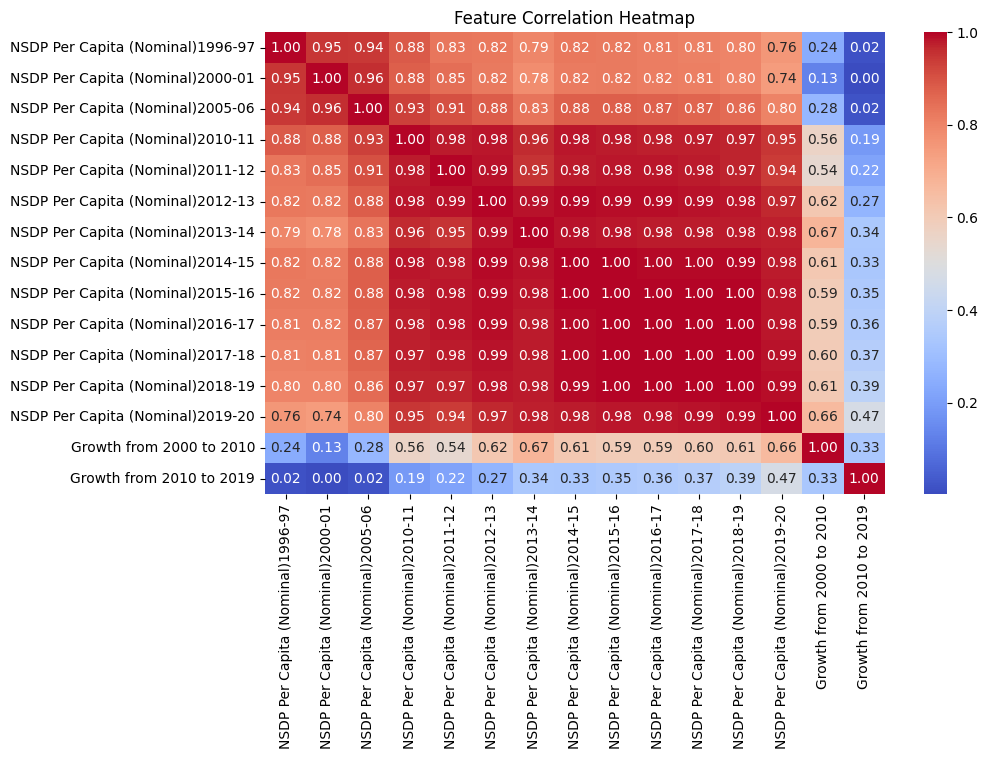

In [ ]:
## Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

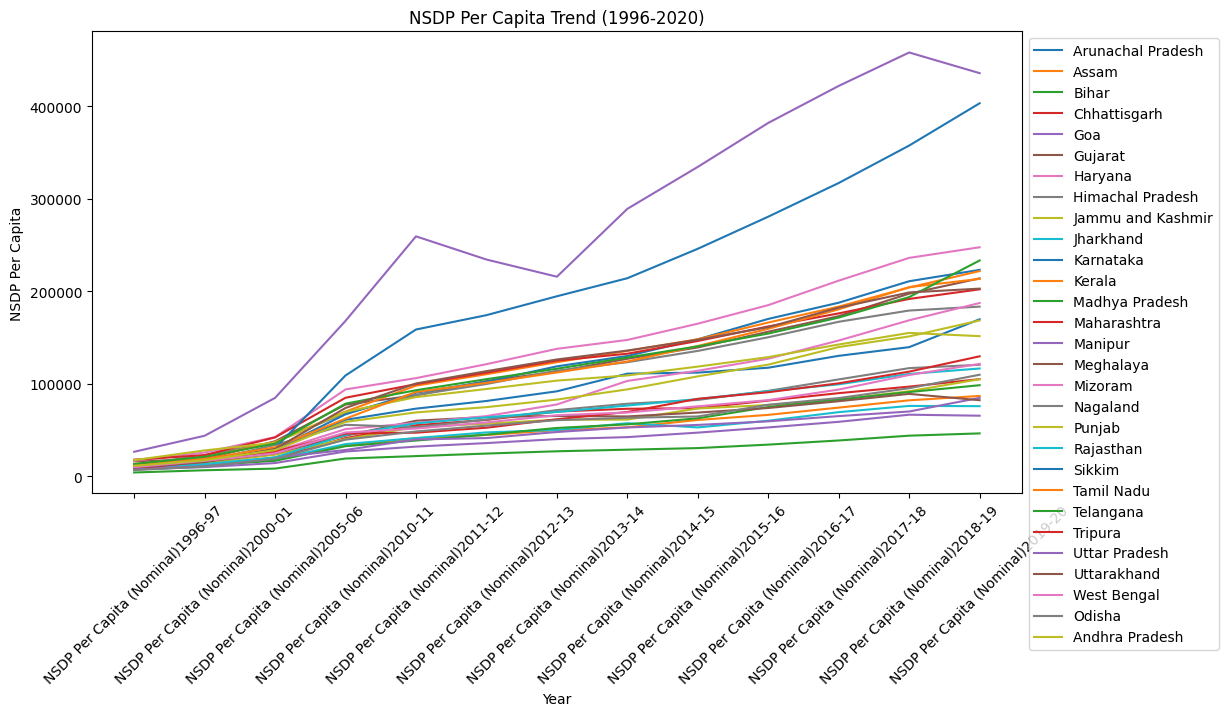

In [ ]:
## NSDP Per Capita Trend Analysis
plt.figure(figsize=(12, 6))
for state in df["State Name"].unique():
    state_data = df[df["State Name"] == state]
    plt.plot(state_data.columns[1:-2], state_data.iloc[:, 1:-2].values.flatten(), label=state)
plt.title("NSDP Per Capita Trend (1996-2020)")
plt.xlabel("Year")
plt.ylabel("NSDP Per Capita")
plt.xticks(rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

<ipython-input-9-35d1841c2c1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10["State Name"], x=top_10["NSDP Per Capita (Nominal)2019-20"], palette="Greens")


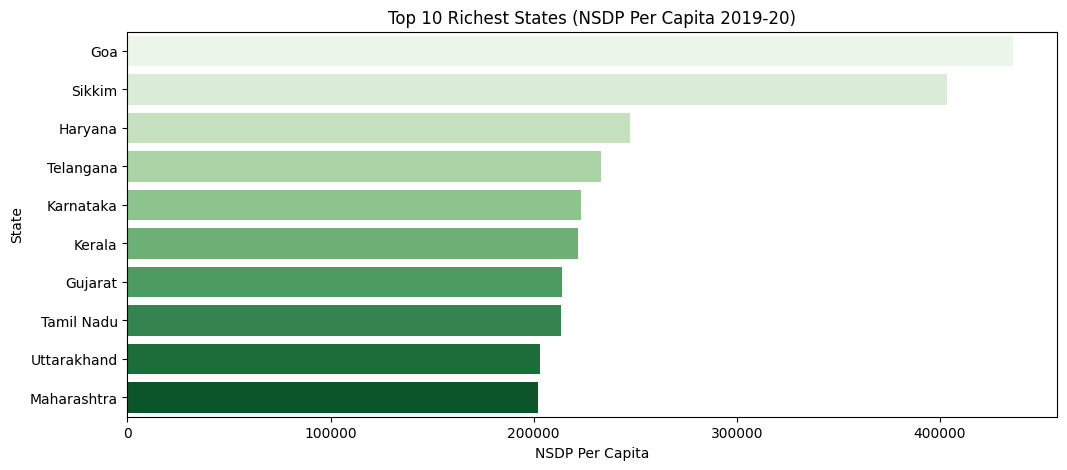

<ipython-input-9-35d1841c2c1d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bottom_10["State Name"], x=bottom_10["NSDP Per Capita (Nominal)2019-20"], palette="Reds")


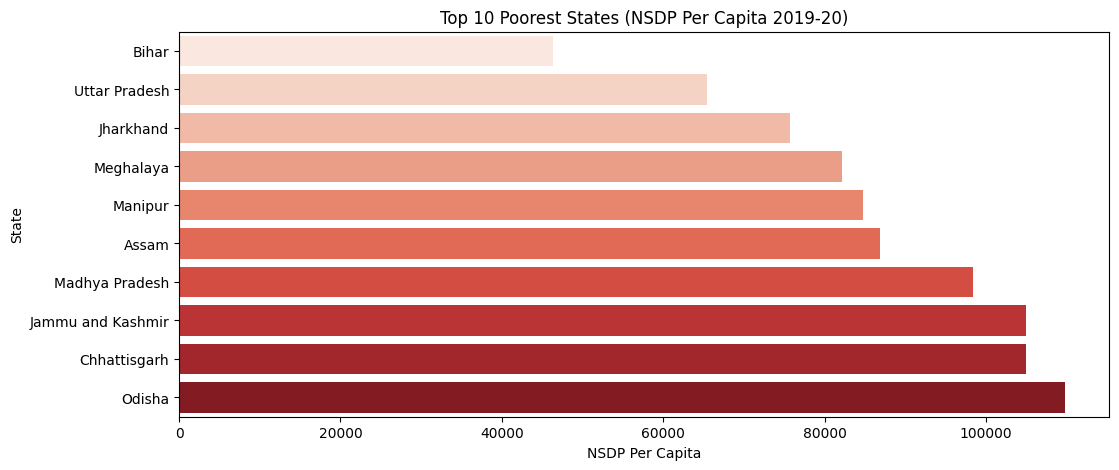

In [ ]:
## Top 10 Richest & Poorest States (Bar Chart)
plt.figure(figsize=(12, 5))
top_10 = df.nlargest(10, "NSDP Per Capita (Nominal)2019-20")
bottom_10 = df.nsmallest(10, "NSDP Per Capita (Nominal)2019-20")

sns.barplot(y=top_10["State Name"], x=top_10["NSDP Per Capita (Nominal)2019-20"], palette="Greens")
plt.title("Top 10 Richest States (NSDP Per Capita 2019-20)")
plt.xlabel("NSDP Per Capita")
plt.ylabel("State")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(y=bottom_10["State Name"], x=bottom_10["NSDP Per Capita (Nominal)2019-20"], palette="Reds")
plt.title("Top 10 Poorest States (NSDP Per Capita 2019-20)")
plt.xlabel("NSDP Per Capita")
plt.ylabel("State")
plt.show()

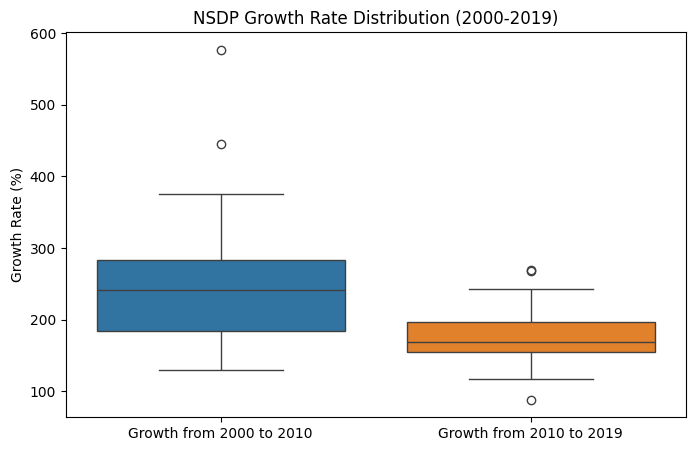

In [ ]:
## Growth Rate Distribution (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["Growth from 2000 to 2010", "Growth from 2010 to 2019"]])
plt.title("NSDP Growth Rate Distribution (2000-2019)")
plt.ylabel("Growth Rate (%)")
plt.show()

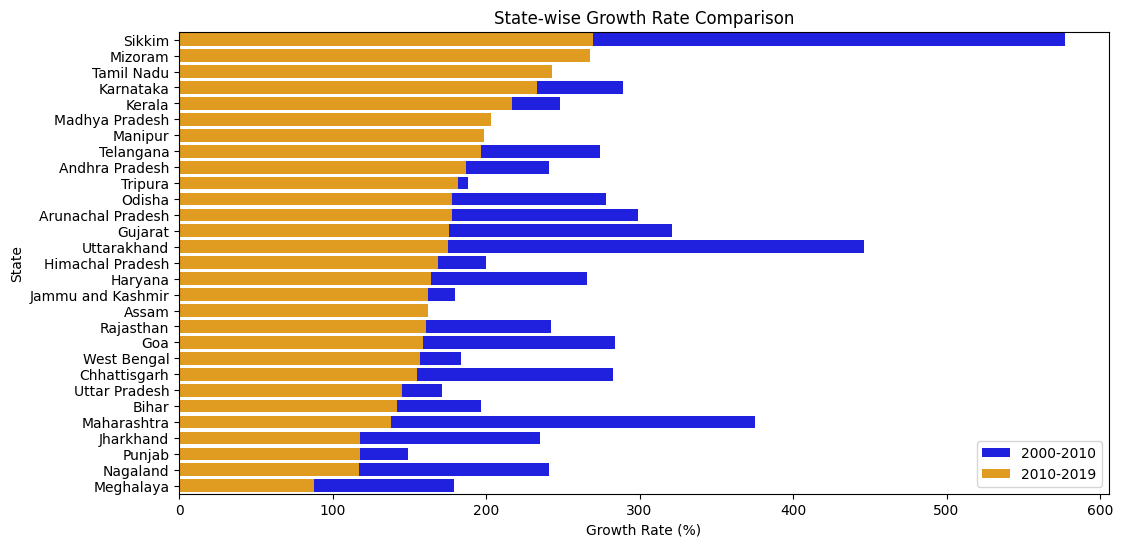

In [ ]:
# State-wise Growth Rate Comparison
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values("Growth from 2010 to 2019", ascending=False)
sns.barplot(y=df_sorted["State Name"], x=df_sorted["Growth from 2000 to 2010"], color="blue", label="2000-2010")
sns.barplot(y=df_sorted["State Name"], x=df_sorted["Growth from 2010 to 2019"], color="orange", label="2010-2019")
plt.legend()
plt.xlabel("Growth Rate (%)")
plt.ylabel("State")
plt.title("State-wise Growth Rate Comparison")
plt.show()

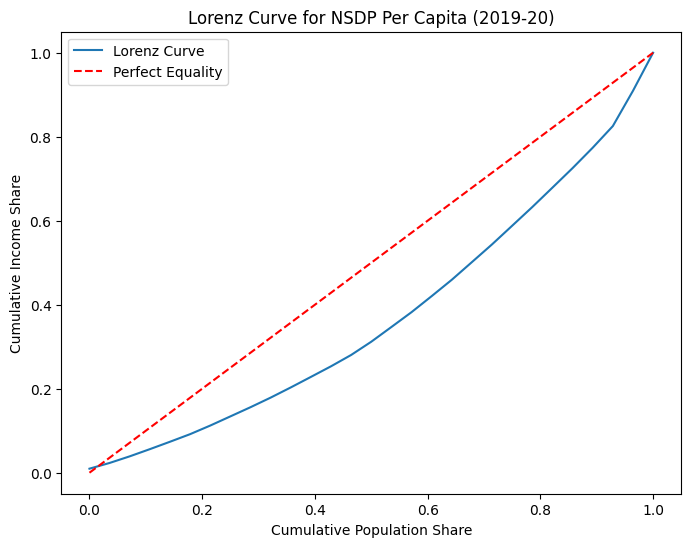

In [ ]:
import numpy as np
income = np.sort(df["NSDP Per Capita (Nominal)2019-20"].dropna())
cumulative_income = np.cumsum(income) / income.sum()
cumulative_population = np.linspace(0, 1, len(income))
plt.figure(figsize=(8, 6))
plt.plot(cumulative_population, cumulative_income, label="Lorenz Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Perfect Equality")
plt.title("Lorenz Curve for NSDP Per Capita (2019-20)")
plt.xlabel("Cumulative Population Share")
plt.ylabel("Cumulative Income Share")
plt.legend()
plt.show()

In [ ]:
# 📌 Save Cleaned Dataset
df.to_csv('cleaned_dataset.csv', index=False)
print("✅ Data Cleaning & EDA Completed! Saved as 'cleaned_dataset.csv'")

✅ Data Cleaning & EDA Completed! Saved as 'cleaned_dataset.csv'


In [ ]:
from sklearn.model_selection import train_test_split

# Select relevant features for prediction (excluding categorical columns)
features = df.select_dtypes(include=[np.number]).drop(columns=["NSDP Per Capita (Nominal)2019-20"])
target = df["NSDP Per Capita (Nominal)2019-20"]

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Performance:\n - Mean Absolute Error: {mae:.2f}\n - R² Score: {r2:.2f}")

📊 Model Performance:
 - Mean Absolute Error: 16725.59
 - R² Score: 0.89


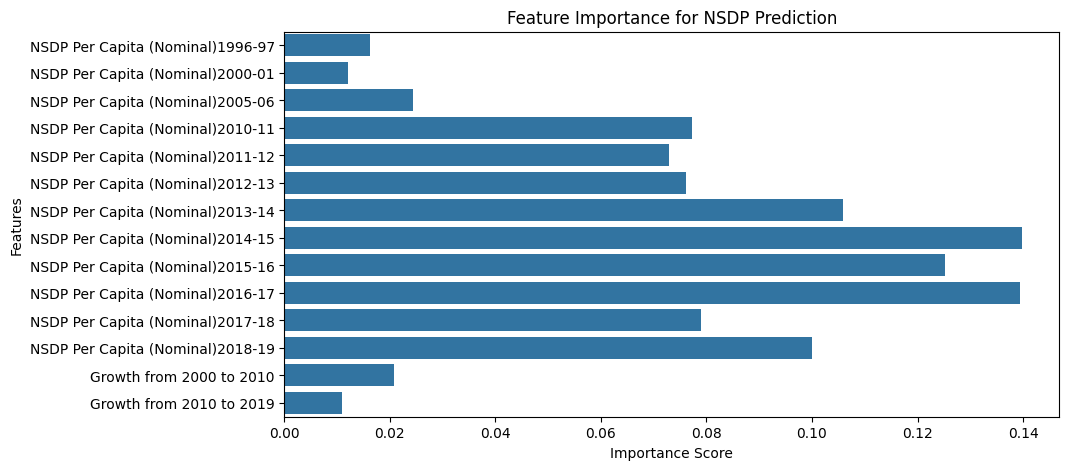

In [ ]:
importances = model.feature_importances_
feature_names = features.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance for NSDP Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Growth from 2010 to 2019", y="NSDP Per Capita (Nominal)2019-20",
                 size="NSDP Per Capita (Nominal)2019-20", color="State Name",
                 title="NSDP Per Capita vs Growth Rate (2010-2019)")
fig.show()

In [ ]:
# ✅ Convert NSDP data into time-series format
df_long = df.melt(id_vars=["State Name"],  # Use correct column name
                  value_vars=[col for col in df.columns if "NSDP Per Capita" in col],
                  var_name="Year",
                  value_name="NSDP")

# ✅ Extract numeric year values
df_long["Year"] = df_long["Year"].str.extract(r'(\d{4})')

# ✅ Ensure conversion is correct
df_long["Year"] = pd.to_numeric(df_long["Year"], errors='coerce')
df_long.dropna(subset=["Year"], inplace=True)  # Remove invalid year values
df_long["Year"] = df_long["Year"].astype(int)  # Convert to integer

# ✅ Sort dataset properly
df_long = df_long.sort_values(["State Name", "Year"]).reset_index(drop=True)

print(df_long.head())  # Preview transformed dataset

       State Name  Year     NSDP
0  Andhra Pradesh  1996  11202.0
1  Andhra Pradesh  2000  17195.0
2  Andhra Pradesh  2005  28223.0
3  Andhra Pradesh  2010  58733.0
4  Andhra Pradesh  2011  69000.0


In [ ]:
future_year = 2030
predictions = {}  # Initialize an empty dictionary to store predictions
for state in df_long["State Name"].unique():  # Use "State Name"
    state_data = df_long[df_long["State Name"] == state]

    # Prepare data (X = Year, y = NSDP)
    X = state_data[["Year"]]
    y = state_data["NSDP"]

    # Train linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict NSDP for the given future year
    future_input = pd.DataFrame({"Year": [future_year]})  # Ensure correct format
    predicted_value = model.predict(future_input)[0]

    predictions[state] = predicted_value

# Convert predictions to DataFrame
future_predictions_df = pd.DataFrame(predictions.items(), columns=["State Name", f"Predicted_NSDP_{future_year}"])

# ✅ Print predictions
print(future_predictions_df.head(10))

          State Name  Predicted_NSDP_2030
0     Andhra Pradesh        213123.919706
1  Arunachal Pradesh        213454.462871
2              Assam        114141.848334
3              Bihar         60496.293099
4       Chhattisgarh        143494.347940
5                Goa        632073.639990
6            Gujarat        275432.954605
7            Haryana        327164.387038
8   Himachal Pradesh        255882.415377
9  Jammu and Kashmir        133752.728155


<ipython-input-24-478c1442a6c3>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




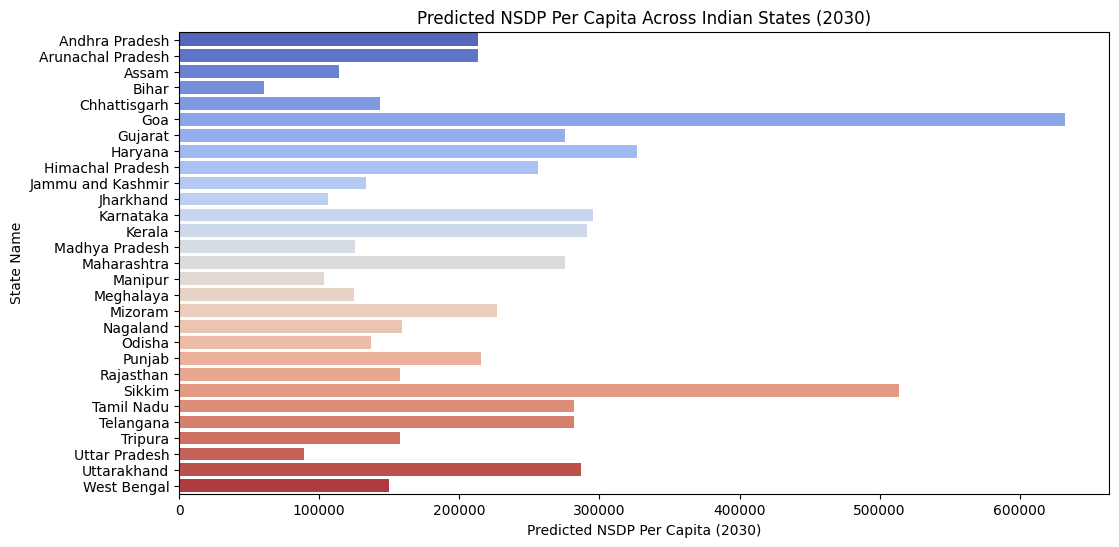

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression



# Assuming df_long is already defined and contains your data
future_year = 2030
predictions = {}

for state in df_long["State Name"].unique():  # Assuming "State Name" is the correct column name
    state_data = df_long[df_long["State Name"] == state]
    X = state_data[["Year"]]  # Assuming "Year" is the correct column name
    y = state_data["NSDP"]  # Assuming "NSDP" is the correct column name

    model = LinearRegression()
    model.fit(X, y)

    future_input = pd.DataFrame({"Year": [future_year]})
    predicted_value = model.predict(future_input)[0]
    predictions[state] = predicted_value

# Create future_predictions_df within this cell
future_predictions_df = pd.DataFrame(predictions.items(), columns=["State Name", f"Predicted_NSDP_{future_year}"])

# Now proceed with your plotting
plt.figure(figsize=(12, 6))
sns.barplot(y=future_predictions_df["State Name"],
            x=future_predictions_df[f"Predicted_NSDP_{future_year}"],
            palette="coolwarm")

plt.xlabel(f"Predicted NSDP Per Capita ({future_year})")
plt.ylabel("State Name")
plt.title(f"Predicted NSDP Per Capita Across Indian States ({future_year})")

plt.show()

In [ ]:
import requests

api_key = "YOUR_NEWS_API_KEY"  # Replace with a valid API key
query = "Indian economy GDP growth"

api_key = "66cbd01fbcef43e8bb19bc5b727e5fe1"  # API key should be in quotes!

url = f"https://newsapi.org/v2/everything?q={query}&apiKey={api_key}"

response = requests.get(url)
news_data = response.json()  # Convert response to JSON

# ✅ Check if 'articles' exists before accessing it
if "articles" in news_data:
    headlines = [article["title"] for article in news_data["articles"]]
    print(headlines[:5])  # Preview top 5 headlines
else:
    print("⚠️ Error: 'articles' key missing in API response.")
    print("🔍 API Response:", news_data)  # Print full response for debugging

["Early summer could spell trouble for India's farms and factories", 'Will Trump’s Tariffs Derail India’s Economy?', 'ETMarkets AIF Talk | Double-Digit returns amid equity volatility: How Vivriti’s debt funds are navigating market uncertainty', 'India’s Nascent Blue Economy: Structural Constraints and Climate Change Challenges', 'India celebrates historic milestone in coal production']


In [ ]:
# Code to Analyze Sentiment

from textblob import TextBlob

# Analyze sentiment of each news headline
sentiments = [TextBlob(headline).sentiment.polarity for headline in headlines]

# Calculate overall sentiment score (average)
avg_sentiment = sum(sentiments) / len(sentiments)

print("\n📊 Public Sentiment on Economy:", avg_sentiment)  # (-1 = very negative, 1 = very positive)


📊 Public Sentiment on Economy: 0.05467757635882635


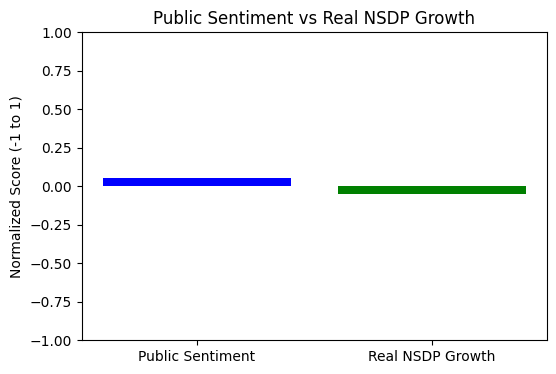

In [ ]:
# Normalize the Values for Better Comparison

import matplotlib.pyplot as plt
import numpy as np

# Normalize NSDP Growth to be on a similar scale as sentiment (-1 to 1)
real_nsd_growth = df["Growth from 2010 to 2019"].mean()
normalized_nsd_growth = (real_nsd_growth - df["Growth from 2010 to 2019"].min()) / (
    df["Growth from 2010 to 2019"].max() - df["Growth from 2010 to 2019"].min()
)
normalized_nsd_growth = 2 * (normalized_nsd_growth - 0.5)  # Scale to -1 to 1

# Bar chart with proper scaling
plt.figure(figsize=(6, 4))
plt.bar(["Public Sentiment", "Real NSDP Growth"], [avg_sentiment, normalized_nsd_growth], color=["blue", "green"])
plt.title("Public Sentiment vs Real NSDP Growth")
plt.ylabel("Normalized Score (-1 to 1)")
plt.ylim(-1, 1)  # Keep values between -1 and 1
plt.show()


In [ ]:
# 🔍 Data Cleaning
# Drop unnecessary columns
df.drop(columns=['Geometry'], inplace=True, errors='ignore')

# Convert NSDP values to numeric (handling unexpected characters)
df.iloc[:, 1:] = df.iloc[:, 1:].replace(r'[^\d.]', '', regex=True).astype(str).apply(pd.to_numeric, errors='coerce')

# Convert Growth columns to numeric
growth_cols = [col for col in df.columns if 'Growth' in col]
for col in growth_cols:
    df[col] = df[col].astype(str).str.replace('%', '').astype(float)


In [ ]:
## Gini Coefficient (Income Inequality Index)
def gini_coefficient(data):
    sorted_data = np.sort(data)
    n = data.size
    cumulative_income = np.cumsum(sorted_data) / sorted_data.sum()
    cumulative_population = np.linspace(0, 1, n)
    return 1 - 2 * np.trapz(cumulative_income, cumulative_population)

In [ ]:
target_col = [col for col in df.columns if "NSDP Per Capita" in col]
if target_col:
    target_col = target_col[0]  # Get the exact name
    gini_value = gini_coefficient(df[target_col].dropna())
    print(f"🔹 Gini Coefficient: {gini_value:.3f} (Higher = More Inequality)")
else:
    raise ValueError("⚠️ NSDP Per Capita column not found in dataset.")

🔹 Gini Coefficient: 0.171 (Higher = More Inequality)


<ipython-input-29-c6ce65629cf8>:7: DeprecationWarning:

`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.



In [ ]:
# 📈 Model Training
# Get numeric features, but exclude the target column
from sklearn.ensemble import GradientBoostingRegressor # Import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor # Import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
# Assuming 'numeric_df' and 'target_col' are already defined
features = numeric_df.drop(columns=[target_col], errors='ignore') # add errors='ignore'
# If the target column is not present in numeric_df, proceed without dropping it.
target = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "NeuralNetwork": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"📊 {name} Model Performance:")
    print(f" - Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f" - R² Score: {r2_score(y_test, y_pred):.2f}\n")

📊 RandomForest Model Performance:
 - Mean Absolute Error: 687.13
 - R² Score: 0.87

📊 GradientBoosting Model Performance:
 - Mean Absolute Error: 583.71
 - R² Score: 0.91

📊 NeuralNetwork Model Performance:
 - Mean Absolute Error: 11531.28
 - R² Score: -23.76



In [ ]:
# 🛠 Hyperparameter Tuning (Random Forest)
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
rf_grid.fit(X_train, y_train)
print(f"✅ Best Parameters: {rf_grid.best_params_}")

# 📌 Save Cleaned Dataset
df.to_csv('enhanced_cleaned_dataset.csv', index=False) # Save to current directory
print("✅ Data Cleaning & Advanced EDA Completed! Saved as 'enhanced_cleaned_dataset.csv'")

✅ Best Parameters: {'max_depth': None, 'n_estimators': 200}
✅ Data Cleaning & Advanced EDA Completed! Saved as 'enhanced_cleaned_dataset.csv'
